# K Nearest Neighbors with Python

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.



## Import Libraries



In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
%matplotlib inline

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Get the Data

Set index_col=0 to use the first column as the index.

In [37]:
df = pd.read_csv("Classified Data",index_col=0)

In [38]:
df.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   

        PJF       HQE       NXJ  TARGET CLASS  
0  0.643798  0.879422  1.231409             1  
1  1.013546  0.621552  1.492702             0  
2  1.154483  0.957877  1.285597             0  
3  1.380003  1.522692  1.153093             1  
4  0.646691  1.463812  1.419167             1

## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [41]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [43]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375 -0.798951   
1 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706 -1.129797   
2 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156  2.599818   
3  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220  1.750208   
4  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773  0.596782   

        PJF       HQE       NXJ  
0 -1.482368 -0.949719 -0.643314  
1 -0.202240 -1.828051  0.636759  
2  0.285707 -0.682494 -0.377850  
3  1.066491  1.241325 -1.026987  
4 -1.472352  1.040772  0.276510

## Train Test Split

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn = KNeighborsClassifier(n_neighbors=1)

In [47]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [50]:
pred = knn.predict(X_test)

In [51]:
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))


****Test accuracy for k = 1 is 89%


## Predictions and Evaluations

Let's evaluate our KNN model!

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(confusion_matrix(y_test,pred))

[[133  22]
 [  9 136]]


In [17]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.93      0.87      0.90       148
          1       0.88      0.93      0.91       152

avg / total       0.90      0.90      0.90       300



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [54]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    #error_rate.append(np.mean(y_test != pred_i))

Text(0,0.5,'Error Rate')

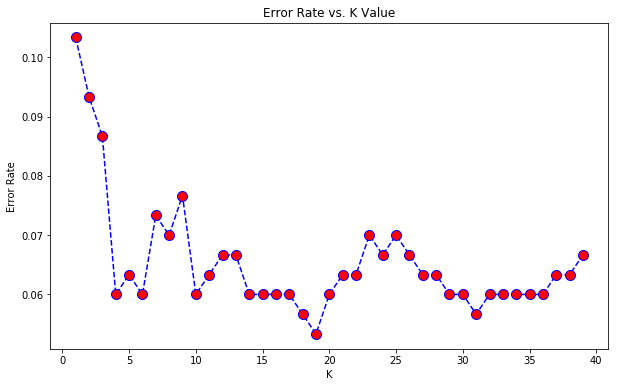

In [55]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>19 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

In [56]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[133  22]
 [  9 136]]


             precision    recall  f1-score   support

          0       0.94      0.86      0.90       155
          1       0.86      0.94      0.90       145

avg / total       0.90      0.90      0.90       300



In [57]:
# NOW WITH K=19
knn = KNeighborsClassifier(n_neighbors=19)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=19')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=19


[[143  12]
 [  4 141]]


             precision    recall  f1-score   support

          0       0.97      0.92      0.95       155
          1       0.92      0.97      0.95       145

avg / total       0.95      0.95      0.95       300



### Simple Cross Validation 


CV accuracy for k = 1 is 92%

CV accuracy for k = 3 is 91%

CV accuracy for k = 5 is 92%

CV accuracy for k = 7 is 92%

CV accuracy for k = 9 is 91%

CV accuracy for k = 11 is 92%

CV accuracy for k = 13 is 93%

CV accuracy for k = 15 is 92%

CV accuracy for k = 17 is 92%

CV accuracy for k = 19 is 92%

CV accuracy for k = 21 is 92%

CV accuracy for k = 23 is 92%

CV accuracy for k = 25 is 94%

CV accuracy for k = 27 is 94%

CV accuracy for k = 29 is 94%


Text(0,0.5,'Accuracy Rate')

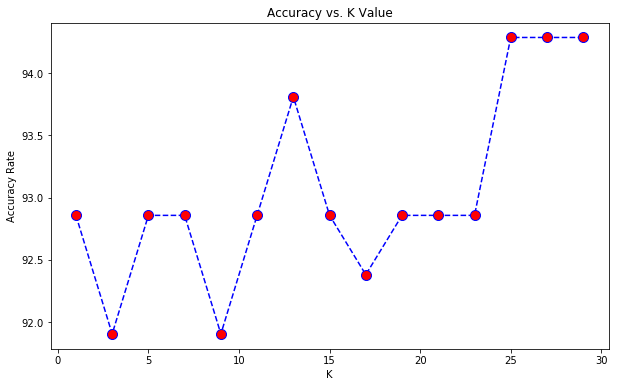

In [58]:
# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_train, y_train, test_size=0.3)
neibhbors=[]
accuracy=[]
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    neibhbors.append(i)
    accuracy.append(acc)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,30,2),accuracy,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')


In [60]:
    
knn1 = KNeighborsClassifier(13)
knn1.fit(X_tr,y_tr)
pred1 = knn1.predict(X_test)
acc = accuracy_score(y_test, pred1, normalize=True) * float(100)
print('\n****Test accuracy for k = 15 is %d%%' % (acc))


****Test accuracy for k = 15 is 94%


### 10 fold cross validation 



The optimal number of neighbors is 27.


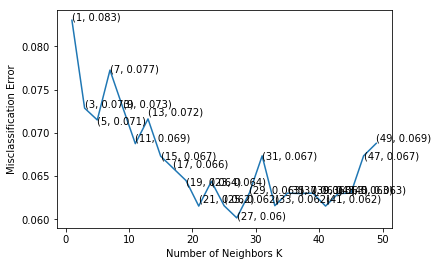

the misclassification error for each k value is :  [0.083 0.073 0.071 0.077 0.073 0.069 0.072 0.067 0.066 0.064 0.062 0.064
 0.062 0.06  0.063 0.067 0.062 0.063 0.063 0.063 0.062 0.063 0.063 0.067
 0.069]


In [61]:
# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [62]:
# NOW WITH K=27
knn2 = KNeighborsClassifier(n_neighbors=27)

knn2.fit(X_train,y_train)
pred2 = knn2.predict(X_test)

print('WITH K=27')
print('\n')
print(confusion_matrix(y_test,pred2))
print('\n')
print(classification_report(y_test,pred2))

acc = accuracy_score(y_test, pred2, normalize=True) * float(100)
print('\n****Test accuracy for k = 27 is %d%%' % (acc))

WITH K=27


[[141  14]
 [  5 140]]


             precision    recall  f1-score   support

          0       0.97      0.91      0.94       155
          1       0.91      0.97      0.94       145

avg / total       0.94      0.94      0.94       300


****Test accuracy for k = 27 is 93%


# Great job!

We were able to squeeze some more performance out of our model by tuning to a better K value!

In [63]:
# Predict output for some future data
dict_new = {'WTT': [0.635422],'PTI':[1.008422],'EQW':[0.538742],'SBI':[0.725645],'LQE':[0.524109],'QWG':[0.148450],'FDJ':[0.975334],'PJF':[1.913546],'HQE':[0.621552],'NXJ':[1.492702]}
df_new=pd.DataFrame(dict_new)
FuturePredict = knn2.predict(df_new)
print(FuturePredict[0])

0
